In [1]:
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

import utils

color_bf = '#D549C2'
color_A, color_B = '#95C7CE', '1.0'

In [2]:
d_spec_A = utils.af.pickle_load('./d_spec_K_A/d_spec_K2166.pkl')
d_spec_B = utils.af.pickle_load('./d_spec_K_B/d_spec_K2166.pkl')

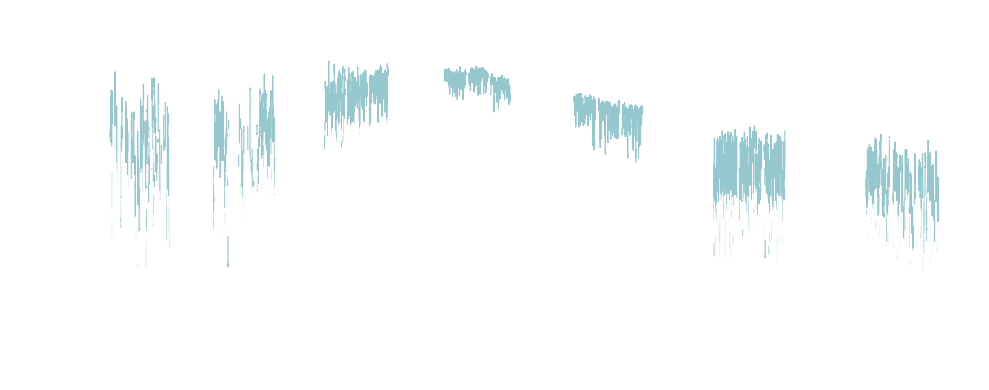

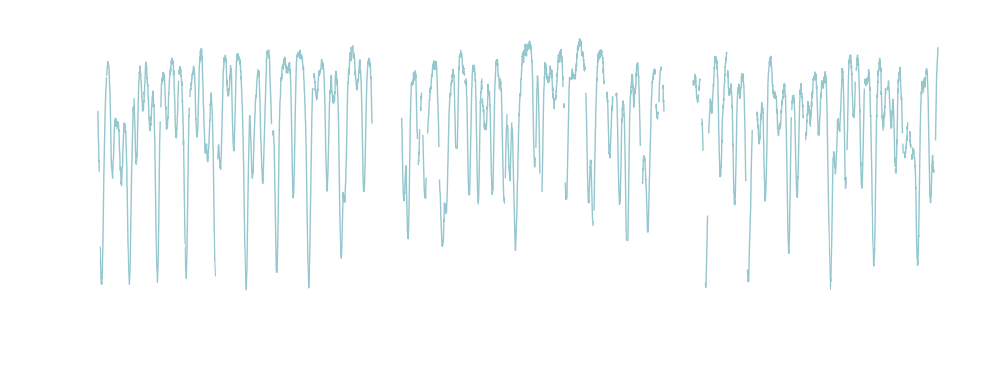

In [3]:
color_A, color_B = '#95C7CE', '1.0'

with plt.rc_context(
    {'axes.edgecolor':'w', 'axes.labelcolor':'w', 
     'xtick.color':'w', 'ytick.color':'w', 
     'axes.facecolor':'none', 'figure.facecolor':'none', 
    }
    ):
    fig, ax = plt.subplots(figsize=(10,4))
#ax.set_facecolor('#090F45')
#fig.set_facecolor('#090F45')

ax.plot(d_spec_A.wave.flatten(), d_spec_A.flux.flatten(), c=color_A, lw=0.8)
ax.plot(d_spec_B.wave.flatten(), d_spec_B.flux.flatten(), c=color_B, lw=0.8)
ax.set(
    ylim=(0,1.0e-13), 
    xlabel=r'Wavelength (nm)', 
    ylabel=r'$F_\lambda\ \mathrm{(erg\ s^{-1}\ cm^{-2}\ nm^{-1})}$'
    )

#[t.set_color('w') for t in ax.xaxis.get_ticklines()]
#[t.set_color('w') for t in ax.xaxis.get_ticklabels()]

plt.tight_layout()
plt.savefig('./plots_Exo_5/spec.png', dpi=400)
plt.show()
plt.close(fig)

with plt.rc_context(
    {'axes.edgecolor':'w', 
     'xtick.color':'w', 
     'ytick.color':'w', 
     'axes.labelcolor':'w', 
     'axes.facecolor':'none', 'figure.facecolor':'none', 
    }
    ):
    fig, ax = plt.subplots(figsize=(10,4))
#ax.set_facecolor('#090F45')
#fig.set_facecolor('#090F45')

ax.plot(d_spec_A.wave[-2].flatten(), d_spec_A.flux[-2].flatten(), c=color_A, lw=1)
ax.plot(d_spec_B.wave[-2].flatten(), d_spec_B.flux[-2].flatten(), c=color_B, lw=1)
ax.set(
    ylim=(0.17e-13,0.7e-13), 
    xlabel=r'Wavelength (nm)', 
    ylabel=r'$F_\lambda\ \mathrm{(erg\ s^{-1}\ cm^{-2}\ nm^{-1})}$'
    )

#[t.set_color('w') for t in ax.xaxis.get_ticklines()]
#[t.set_color('w') for t in ax.xaxis.get_ticklabels()]

plt.tight_layout()
plt.savefig('./plots_Exo_5/spec_zoom_in.png', dpi=400)
plt.show()
plt.close(fig)

In [4]:
del d_spec_A, d_spec_B

In [5]:
Res     = utils.RetrievalResults(prefix='../retrieval_outputs/spec_K_B/test_')
d_spec  = Res._load_object('d_spec', bestfit_prefix=False)
LogLike = Res._load_object('LogLike', bestfit_prefix=True)

import copy
def get_m_spec_wo_species(Res_i, line_species):

    # Load the necessary objects
    Res_i._load_objects_as_attr(['Chem', 'PT'])
    pRT_atm = Res_i._load_object('pRT_atm', bestfit_prefix=False)

    # Change the parameters for model w/o one of the species
    params = copy.copy(Res_i.bestfit_params[Res_i.m_set])

    mf = copy.deepcopy(Res_i.Chem.mass_fractions)

    for key_i in mf.keys():
        if key_i == line_species:
            # Set abundances of this species to 0
            mf[key_i] *= 0

    # Update the pRT model
    m_spec = pRT_atm(mf, Res_i.PT.temperature, params)
    return m_spec

flux_wo_species = {
    'CH4_hargreaves_main_iso': None, 
    'CO_main_iso': None, 
    'H2O_pokazatel_main_iso': None, 
    'CO_36': None, 
    'NH3_coles_main_iso': None, 
    'HF_main_iso': None, 
    'complete': None, 
}
for line_species_i in flux_wo_species.keys():
    print(line_species_i)

    m_spec_i = get_m_spec_wo_species(Res, line_species_i)
    m_spec_i.flux[:,:,:1]  = np.nan
    m_spec_i.flux[:,:,-1:] = np.nan
    flux_wo_species[line_species_i] = (m_spec_i.flux * LogLike.phi).flatten()

    del m_spec_i

  analysing data from ../retrieval_outputs/spec_K_B/test_.txt
CH4_hargreaves_main_iso


AttributeError: 'pRT_model' object has no attribute 'Cloud'

/tmp/ipykernel_739535/1126527632.py:66: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


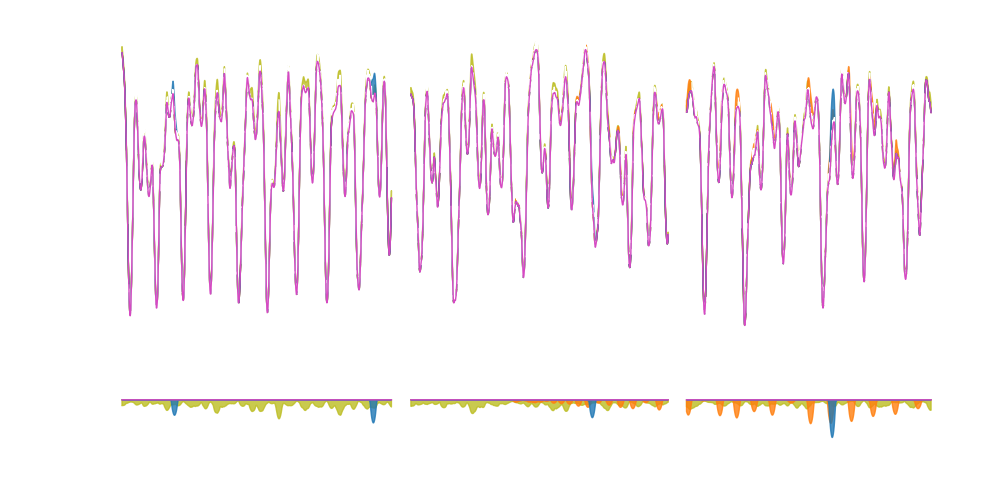

In [ ]:
d_wave = d_spec.wave.flatten()

with plt.rc_context(
    {'axes.edgecolor':'w', 'axes.labelcolor':'w', 
     'xtick.color':'w', 'ytick.color':'w', 
     'axes.facecolor':'none', 'figure.facecolor':'none', 
     #'axes.facecolor':'k', 'figure.facecolor':'k', 
    }
    ):
    fig, ax = plt.subplots(
        figsize=(10,5), nrows=2, sharex=True, 
        gridspec_kw={
            #'height_ratios':[1,0.15], 'hspace':0.08, 
            'height_ratios':[1,0.25], 'hspace':0.08, 
            'left':0.08, 'right':0.97, 'bottom':0.11, 'top':0.94
            }
        )
ax[0].plot(d_wave, d_spec.flux.flatten(), c=color_B, lw=1)
ax[0].plot(d_wave, flux_wo_species['complete'], c=color_bf, lw=1)

ax[1].plot(d_wave, (d_spec.flux-LogLike.m_flux_phi).flatten()/1e-14, c=color_B, lw=1)
#ax[1].plot(d_wave, (d_spec.flux.flatten()-flux_wo_species[line_species_i])/1e-14, c=color_B, lw=1)

#'''
#iterables = zip(['NH3_coles_main_iso'], ['C8'])
#iterables = zip(['NH3_coles_main_iso','CO_36'], ['C8','C1'])
iterables = zip(['NH3_coles_main_iso','CO_36','HF_main_iso'], ['C8','C1','C0'])
#iterables = zip(
#    ['H2O_pokazatel_main_iso','CO_main_iso','CH4_hargreaves_main_iso','NH3_coles_main_iso','CO_36','HF_main_iso'], 
#    ['C3','C2','C4','C8','C1','C0']
#    )
for line_species_i, color_i in iterables:
    ax[0].fill_between(
        d_wave, y1=flux_wo_species['complete'], y2=flux_wo_species[line_species_i], 
        fc=color_i, ec=color_i, alpha=0.8, zorder=-1
    )
    ax[1].fill_between(
        d_wave, y1=0*d_wave, y2=(flux_wo_species['complete'] - flux_wo_species[line_species_i])/1e-14, 
        fc=color_i, ec=color_i, alpha=0.8, zorder=2#zorder=-1
    )
#'''

for i in range(d_spec.n_orders):
    for j in range(d_spec.n_dets):
        ax[1].plot(d_spec.wave[i,j].flatten(), 0*d_spec.wave[i,j].flatten(), c=color_bf, lw=1)

ax[0].set(
    #ylim=(0.17e-13,0.7e-13), 
    #xlabel=r'Wavelength (nm)', 
    #xlim=(2321,2338), 
    #xlim=(2355,2370), 
    ylabel=r'$F_\lambda\ \mathrm{(erg\ s^{-1}\ cm^{-2}\ nm^{-1})}$'
)

height_ratio = ax[1].get_position().bounds[-1] / ax[0].get_position().bounds[-1]
ylim_0 = ax[0].get_ylim()
ylim_1 = (-0.5*height_ratio*np.diff(ylim_0)/1e-14, +0.5*height_ratio*np.diff(ylim_0)/1e-14)
#ylim_1 = ax[1].get_ylim()
#ylim_1 = (-0.5*np.diff(ylim_1), +0.5*np.diff(ylim_1))
ax[1].set(
    #ylim=(0.17e-13,0.7e-13), 
    ylim=ylim_1, 
    xlabel=r'Wavelength (nm)', ylabel=r'Residuals'
)

plt.tight_layout()
#plt.savefig('./plots_Exo_5/spec_fit.png', dpi=400)
#plt.savefig('./plots_Exo_5/spec_fit_NH3.png', dpi=400)
#plt.savefig('./plots_Exo_5/spec_fit_13CO.png', dpi=400)
plt.savefig('./plots_Exo_5/spec_fit_HF.png', dpi=400)
plt.show()
plt.close(fig)

In [ ]:
del flux_wo_species, d_wave

In [ ]:
p_wave, p_flux, p_flux_broad, Rot = Res.get_example_line_profile(return_Rot=True)

params_copy = Res.bestfit_params[Res.m_set].copy()
print(Res.bestfit_params[Res.m_set]['vsini'], params_copy['vsini'])

Res.bestfit_params[Res.m_set]['vsini'] = 1/3*params_copy['vsini']
_, _, p_flux_vsini_33, _ = Res.get_example_line_profile(return_Rot=True)
print(Res.bestfit_params[Res.m_set]['vsini'], params_copy['vsini'])

Res.bestfit_params[Res.m_set]['vsini'] = 2/3*params_copy['vsini']
_, _, p_flux_vsini_66, _ = Res.get_example_line_profile(return_Rot=True)
print(Res.bestfit_params[Res.m_set]['vsini'], params_copy['vsini'])

Res.bestfit_params[Res.m_set] = params_copy

25.115269558053754 25.115269558053754
8.371756519351251 25.115269558053754
16.743513038702503 25.115269558053754


In [ ]:
for i, line_i in enumerate([p_flux, p_flux_vsini_33, p_flux_vsini_66, p_flux_broad]):
    with plt.rc_context(
        {'axes.edgecolor':'none', 'axes.facecolor':'none', 'figure.facecolor':'none'}
        ):
        fig, ax = plt.subplots(figsize=(6,3.5))

    cmap = utils.get_cmap(['w',color_bf])
    ax.plot(p_wave*0, p_flux, c=cmap(i/3), lw=2)
    ax.plot(p_wave, line_i, c=cmap(i/3), lw=4)
    ax.set(yticks=[], xticks=[], xlim=(p_wave.mean()-0.75,p_wave.mean()+0.75))
    plt.tight_layout()
    plt.savefig('./plots_Exo_5/vsini_{:.2f}_line_profile.png'.format(i/3), dpi=250)
    #plt.show()
    plt.close()

In [ ]:
p_wave, p_flux, p_flux_broad, Rot = Res.get_example_line_profile(return_Rot=True)

Res.bestfit_params[Res.m_set]['lon_band_lower'] = 0
Res.bestfit_params[Res.m_set]['lon_band_upper'] = 180
Res.bestfit_params[Res.m_set]['epsilon_band'] = 0.7
_, _, p_flux_broad_hemi, Rot = Res.get_example_line_profile(return_Rot=True)

Res.bestfit_params[Res.m_set].pop('lon_band_lower')
Res.bestfit_params[Res.m_set].pop('lon_band_upper')
Res.bestfit_params[Res.m_set].pop('epsilon_band')

#Res.bestfit_params[Res.m_set]['lat_band_lower'] = -45
#Res.bestfit_params[Res.m_set]['lat_band_upper'] = 45
#Res.bestfit_params[Res.m_set]['epsilon_band'] = 0.2
#_, _, p_flux_broad_lat, Rot = Res.get_example_line_profile(return_Rot=True)
#
#Res.bestfit_params[Res.m_set].pop('lat_band_lower')
#Res.bestfit_params[Res.m_set].pop('lat_band_upper')
#Res.bestfit_params[Res.m_set].pop('epsilon_band')

0.7

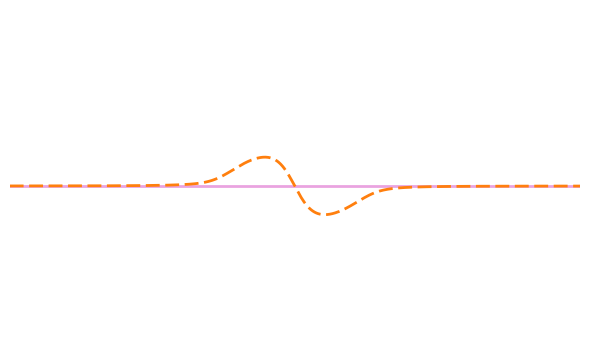

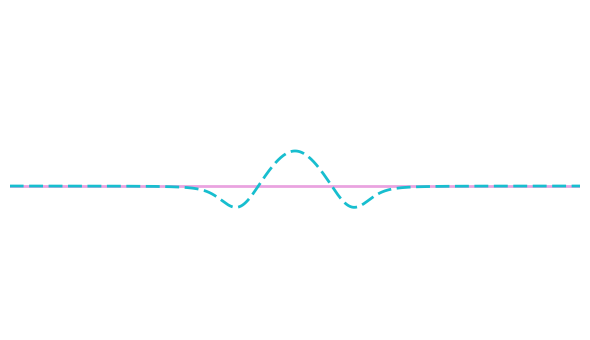

In [ ]:
xlim = (p_wave.mean()-0.75,p_wave.mean()+0.75)
ylim = (0.62, 1.03)

with plt.rc_context(
    {'axes.edgecolor':'none', 'axes.facecolor':'none', 'figure.facecolor':'none'}
    ):
    fig, ax = plt.subplots(figsize=(6,3.5))

ax.plot(p_wave, p_flux_broad, c=color_bf, lw=2)

ax.set(yticks=[], xticks=[], xlim=xlim, ylim=ylim)
plt.tight_layout()
plt.savefig('./plots_Exo_5/homogeneous_line_profile.png', dpi=300)
#plt.show()
plt.close()

with plt.rc_context(
    {'axes.edgecolor':'none', 'axes.facecolor':'none', 'figure.facecolor':'none'}
    ):
    fig, ax = plt.subplots(figsize=(6,3.5))

ax.plot(p_wave, p_flux_broad, c=color_bf, lw=2, alpha=0.5)
ax.plot(p_wave, p_flux_broad_hemi, c='C1', lw=2, ls=(0,(5,2)))

ax.set(yticks=[], xticks=[], xlim=xlim, ylim=ylim)
plt.tight_layout()
plt.savefig('./plots_Exo_5/hemi_line_profile.png', dpi=300)
#plt.show()
plt.close()

with plt.rc_context(
    {'axes.edgecolor':'none', 'axes.facecolor':'none', 'figure.facecolor':'none'}
    ):
    fig, ax = plt.subplots(figsize=(6,3.5))

ax.plot(p_wave, 0*p_flux_broad, c=color_bf, lw=2, alpha=0.5)
ax.plot(p_wave, p_flux_broad-p_flux_broad_hemi, c='C1', lw=2, ls=(0,(5,2)))

ax.set(yticks=[], xticks=[], xlim=xlim, ylim=np.diff(ylim)*np.array([-0.45,+0.55]))
plt.tight_layout()
plt.savefig('./plots_Exo_5/hemi_line_profile_res.png', dpi=300)
plt.show()
plt.close()

with plt.rc_context(
    {'axes.edgecolor':'none', 'axes.facecolor':'none', 'figure.facecolor':'none'}
    ):
    fig, ax = plt.subplots(figsize=(6,3.5))

ax.plot(p_wave, p_flux_broad, c=color_bf, lw=2, alpha=0.5)
#ax.plot(p_wave, p_flux_broad_hemi, c='C1', lw=2, ls=(0,(5,2)), alpha=0.5)
ax.plot(p_wave, p_flux_broad_lat, c='C9', lw=2, ls=(0,(5,2)))

ax.set(yticks=[], xticks=[], xlim=xlim, ylim=ylim)
plt.tight_layout()
plt.savefig('./plots_Exo_5/lat_band_line_profile.png', dpi=300)
#plt.show()
plt.close()

with plt.rc_context(
    {'axes.edgecolor':'none', 'axes.facecolor':'none', 'figure.facecolor':'none'}
    ):
    fig, ax = plt.subplots(figsize=(6,3.5))

ax.plot(p_wave, 0*p_flux_broad, c=color_bf, lw=2, alpha=0.5)
ax.plot(p_wave, p_flux_broad-p_flux_broad_lat, c='C9', lw=2, ls=(0,(5,2)))

ax.set(yticks=[], xticks=[], xlim=xlim, ylim=np.diff(ylim)*np.array([-0.45,+0.55]))
plt.tight_layout()
plt.savefig('./plots_Exo_5/lat_band_line_profile_res.png', dpi=300)
plt.show()
plt.close()

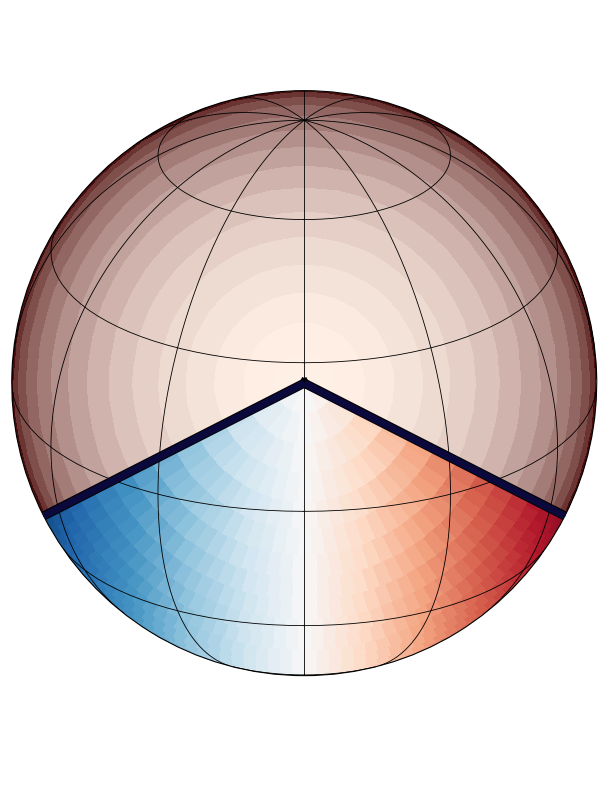

In [ ]:
cmap = utils.get_cmap()

ax_thetalim  = np.array([
    -np.pi/2 + 1/2*1.3*np.pi*np.array([-1,1]), 
    np.pi/2 + 1/2*(2-1.3)*np.pi*np.array([-1,1])
    #-np.pi/2 + 1/2*1.6*np.pi*np.array([-1,1]), 
    #np.pi/2 + 1/2*(2-1.6)*np.pi*np.array([-1,1])
    ]) - np.pi
#ax_thetalim = [None,None]
cax_thetalim = [
    (np.pi/2-np.pi/4,np.pi/2+np.pi/4), 
    (-np.pi/2-np.pi/4.5,-np.pi/2+np.pi/4.5), 
    ]

with plt.rc_context(
    {'axes.edgecolor':'k', 'axes.labelcolor':'w', 
     'xtick.color':'w', 'ytick.color':'w', 
     'axes.facecolor':'none', 'figure.facecolor':'none', 
     #'axes.facecolor':'k', 'figure.facecolor':'k', 
    }
    ):
    fig = plt.figure(figsize=(6.5,6.5))
    gs = fig.add_gridspec(
        nrows=1, ncols=1, left=0.05, right=0.95, top=0.95, bottom=0.05
        )

    ax = np.array([
        fig.add_subplot(gs[0,0], projection='polar'), 
        fig.add_subplot(gs[0,0], projection='polar'), 
    ])
    cax = np.array([
        #fig.add_subplot(gs[0,0], projection='polar'), 
        #fig.add_subplot(gs[0,0], projection='polar'), 
    ])

sphere = utils.SpherePlot(Rot, fig, ax[1], )#cax[0])
sphere.plot_map(
    attr='int_flux', cmap=cmap, edgecolors='face', lw=1e-6, 
    )
sphere.configure_ax(
    xlim=ax_thetalim[0], grid_lw=0.6, 
    #sep_spine_kwargs=None, 
    sep_spine_kwargs={'capstyle':'butt', 'c':'#0B083C'}
    )
#sphere.configure_cax(
#    label=labels[0], xlim=cax_thetalim[0], cb_width=0.07, scale=1.12, flip_cb=False, 
#    xticks=[0.0,0.2,0.4,0.6,0.8,1.0], vmin=1., vmax=0., cmap=cmap
#    #xticks=[1.0,0.8,0.6,0.4,0.2,0.0], vmin=0., vmax=1., cmap=cmap
#    )

# --- Velocity map ----------------------------------
#Rot.new_map = 2/3*Rot.v_grid

sphere = utils.SpherePlot(Rot, fig, ax[0], )#cax[1])
sphere.plot_map(
    attr='v_grid', cmap='RdBu_r', edgecolors='face', lw=1e-6, 
    #attr='new_map', cmap='RdBu_r', edgecolors='face', lw=1e-6, 
    #vmin=-Res.bestfit_params[Res.m_set]['vsini'], 
    #vmax=+Res.bestfit_params[Res.m_set]['vsini']
    )
sphere.configure_ax(
    xlim=ax_thetalim[1], grid_lw=0.6, 
    #sep_spine_kwargs=None, 
    sep_spine_kwargs={'capstyle':'butt', 'c':'#0B083C'}
    )
#sphere.configure_cax(
#    label=labels[1], 
#    xlim=cax_thetalim[1], cb_width=0.07, scale=1.12, 
#    #xticks=np.arange(-25,25+1,5), vmin=-vsini_i, vmax=vsini_i, cmap='RdBu_r'
#    xticks=np.arange(-25,25+1,5), 
#    xticklabels=np.array(['',r'$-$20','',r'$-$10','','0','','10','','20','']), 
#    vmin=-vsini_i, vmax=vsini_i, cmap='RdBu_r'
#    )
#plt.savefig('./plots_Exo_5/v_map.png', dpi=400)
#plt.savefig('./plots_Exo_5/brightness_map.png', dpi=400)
plt.savefig('./plots_Exo_5/homogeneous_map.png', dpi=400)
#plt.savefig('./plots_Exo_5/vsini_0_map.png', dpi=400)
#plt.savefig('./plots_Exo_5/hemi_map.png', dpi=400)
#plt.savefig('./plots_Exo_5/lat_band_map.png', dpi=400)
#plt.savefig('./plots_Exo_5/vsini_0.3_map.png', dpi=400)
plt.show()
plt.close()

del sphere

In [ ]:
del Res, d_spec, LogLike, Rot

# Retrieval surface-map results

In [2]:
Res = utils.RetrievalResults(prefix='../retrieval_outputs/no_bands_K_B_ret_8/test_')
_Res = utils.RetrievalResults(prefix='../retrieval_outputs/eq_band_K_B_ret_7/test_')

print(Res.compare_evidence(_Res.ln_Z))
print(Res.ln_Z, _Res.ln_Z)

del _Res, Res

  analysing data from ../retrieval_outputs/no_bands_K_B_ret_8/test_.txt


AttributeError: 'RetrievalResults' object has no attribute 'ln_Z'

In [16]:
CCF_SNR_old = None

#'''
#Res = utils.RetrievalResults(prefix='../retrieval_outputs/no_bands_K_B_ret_7/test_')
Res = utils.RetrievalResults(prefix='../retrieval_outputs/no_bands_K_B_ret_18/test_')
#Res = utils.RetrievalResults(prefix='../retrieval_outputs/spot_K_B_ret_32/test_')
#Res = utils.RetrievalResults(prefix='../retrieval_outputs/no_bands_K_A_ret_3/test_')

_, flux_global, Rot       = Res.get_model_spec(is_local=False)
wave_local, flux_local, _ = Res.get_model_spec(is_local=True)
rv, CCF, CCF_SNR = Res.get_CCF(
    wave_local, flux_local, 
    model_to_subtract_from_m_res=flux_global, 
    model_to_subtract_from_d_res='complete', 
    )
del wave_local, flux_local, flux_global
CCF_SNR_old = CCF_SNR

#'''
Res = utils.RetrievalResults(prefix='../retrieval_outputs/no_bands_K_B_ret_19/test_')
#Res = utils.RetrievalResults(prefix='../retrieval_outputs/eq_band_K_B_ret_13/test_')
#Res = utils.RetrievalResults(prefix='../retrieval_outputs/no_bands_K_B_ret_12/test_')
#Res = utils.RetrievalResults(prefix='../retrieval_outputs/spot_K_B_ret_32/test_')
#Res = utils.RetrievalResults(prefix='../retrieval_outputs/lon_band_K_B_ret_1/test_')

_, flux_global, Rot       = Res.get_model_spec(is_local=False)
wave_local, flux_local, _ = Res.get_model_spec(is_local=True)
rv, CCF, CCF_SNR = Res.get_CCF(
    wave_local, flux_local, 
    model_to_subtract_from_m_res=flux_global, 
    model_to_subtract_from_d_res='complete', 
    )
del wave_local, flux_local, flux_global
#'''

'''
CCF_SNR_old = CCF_SNR
#Res = utils.RetrievalResults(prefix='../retrieval_outputs/eq_band_K_B_ret_5/test_', load_posterior=True)
Res = utils.RetrievalResults(prefix='../retrieval_outputs/eq_band_K_B_ret_7/test_', load_posterior=True)

_, flux_global, Rot       = Res.get_model_spec(is_local=False)
wave_local, flux_local, _ = Res.get_model_spec(is_local=True)
rv, CCF, CCF_SNR = Res.get_CCF(
    wave_local, flux_local, flux_global, subtract_global=True, 
    )
del wave_local, flux_local, flux_global
#'''

  analysing data from ../retrieval_outputs/no_bands_K_B_ret_18/test_.txt


100%|██████████| 1201/1201 [00:05<00:00, 212.49it/s]


  analysing data from ../retrieval_outputs/no_bands_K_B_ret_19/test_.txt


100%|██████████| 1201/1201 [00:05<00:00, 207.49it/s]


"\nCCF_SNR_old = CCF_SNR\n#Res = utils.RetrievalResults(prefix='../retrieval_outputs/eq_band_K_B_ret_5/test_', load_posterior=True)\nRes = utils.RetrievalResults(prefix='../retrieval_outputs/eq_band_K_B_ret_7/test_', load_posterior=True)\n\n_, flux_global, Rot       = Res.get_model_spec(is_local=False)\nwave_local, flux_local, _ = Res.get_model_spec(is_local=True)\nrv, CCF, CCF_SNR = Res.get_CCF(\n    wave_local, flux_local, flux_global, subtract_global=True, \n    )\ndel wave_local, flux_local, flux_global\n#"

In [12]:
*_, Rot_band = Res.get_model_spec(is_local=False, m_set='K2166_band')
Res.add_patch_to_Rot(Rot, Rot_band)

#*_, Rot_spot = Res.get_model_spec(is_local=False, m_set='K2166_spot')
#Res.add_patch_to_Rot(Rot, Rot_spot)

#np.savetxt('coords.dat', np.vstack((Rot_band.mu_grid, Rot_band.theta_grid)).T)

/home/sam/Documents/PhD/CRIRES_data_reduction/retrieval_base/Luhman_16/figures/utils.py:903: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_thetalim(xlim)


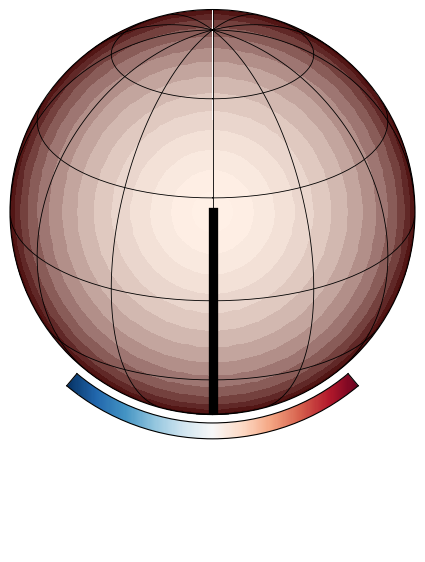

In [17]:
cmap = utils.get_cmap()

ax_thetalim  = np.array([
    -np.pi/2 + 1/2*2*np.pi*np.array([-1,1]), 
    np.pi/2 + 1/2*(2-2)*np.pi*np.array([-1,1])
    ]) - np.pi
#ax_thetalim = [None,None]
cax_thetalim = [
    (np.pi/2-np.pi/4,np.pi/2+np.pi/4), 
    (-np.pi/2-np.pi/4.5,-np.pi/2+np.pi/4.5), 
    #(np.pi/2-np.pi/2,np.pi/2+np.pi/2), 
    #(-np.pi/2-np.pi*0.05,-np.pi/2+np.pi*0.05), 
    ]

with plt.rc_context(
    {'axes.edgecolor':'k', 'axes.labelcolor':'w', 
     'xtick.color':'w', 'ytick.color':'w', 
     'axes.facecolor':'none', 'figure.facecolor':'none', 
    }
    ):
    fig = plt.figure(figsize=(4.5,5.2))
    gs = fig.add_gridspec(
        nrows=1, ncols=1, left=0.05, right=0.95, top=0.96, bottom=0.12
        )

    ax = np.array([
        fig.add_subplot(gs[0,0], projection='polar'), 
        fig.add_subplot(gs[0,0], projection='polar'), 
    ])
    cax = np.array([
        None, 
        #fig.add_subplot(gs[0,0], projection='polar'), 
        fig.add_subplot(gs[0,0], projection='polar'), 
    ])

sphere = utils.SpherePlot(Rot, fig, ax[1], )#cax[0])
sphere.plot_map(
    attr='int_flux', cmap=cmap, edgecolors='face', lw=1e-6, 
    )
sphere.configure_ax(
    xlim=ax_thetalim[0], grid_lw=0.6, sep_spine_kwargs={'capstyle':'butt', 'c':'#0B083C'}, 
    )
#sphere.configure_cax(
#    label=labels[0], xlim=cax_thetalim[0], cb_width=0.07, scale=1.12, flip_cb=False, 
#    xticks=[0.0,0.2,0.4,0.6,0.8,1.0], vmin=1., vmax=0., cmap=cmap
#    #xticks=[1.0,0.8,0.6,0.4,0.2,0.0], vmin=0., vmax=1., cmap=cmap
#    )

# --- Velocity map ----------------------------------
vsini_i = Res.bestfit_params[Res.m_set]['vsini']

sphere = utils.SpherePlot(Rot, fig, ax[0], cax[1])
sphere.plot_map(
    attr='v_grid', cmap='RdBu_r', edgecolors='face', lw=1e-6, 
    )
sphere.configure_ax(
    xlim=ax_thetalim[1], grid_lw=0.6, sep_spine_kwargs={'capstyle':'butt', 'c':'#0B083C'}, 
    )
sphere.configure_cax(
    label=None, #r'$v_\mathrm{rot}\ \mathrm{(km\ s^{-1})}$', 
    xlim=cax_thetalim[1], cb_width=0.07, scale=1.12, 
    #xticks=np.arange(-25,25+1,5), vmin=-vsini_i, vmax=vsini_i, cmap='RdBu_r'
    xticks=np.arange(-25,25+1,5), xticklabels=np.array(['',r'$-$20','',r'$-$10','','0','','10','','20','']), 
    vmin=-vsini_i, vmax=vsini_i, cmap='RdBu_r'
    )
fig.text(0.5, 0.035, r'$v\ \mathrm{(km\ s^{-1})}$', c='w', ha='center', va='center')

#plt.savefig('./plots_Exo_5/no_band_ret_map.png', dpi=400)
#plt.savefig('./plots_Exo_5/eq_band_ret_map.png', dpi=400)
plt.show()
plt.close()

del sphere

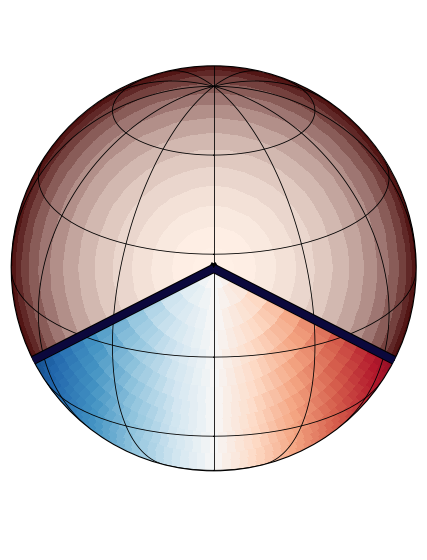

In [18]:
cmap = utils.get_cmap()

ax_thetalim  = np.array([
    -np.pi/2 + 1/2*1.3*np.pi*np.array([-1,1]), 
    np.pi/2 + 1/2*(2-1.3)*np.pi*np.array([-1,1])
    ]) - np.pi
#ax_thetalim = [None,None]
cax_thetalim = [
    (np.pi/2-np.pi/4,np.pi/2+np.pi/4), 
    (-np.pi/2-np.pi/4.5,-np.pi/2+np.pi/4.5), 
    ]

with plt.rc_context(
    {'axes.edgecolor':'k', 'axes.labelcolor':'w', 
     'xtick.color':'w', 'ytick.color':'w', 
     'axes.facecolor':'none', 'figure.facecolor':'none', 
    }
    ):
    fig = plt.figure(figsize=(4.5,5.2))
    gs = fig.add_gridspec(
        nrows=1, ncols=1, left=0.05, right=0.95, top=0.96, bottom=0.12
        )

    ax = np.array([
        fig.add_subplot(gs[0,0], projection='polar'), 
        fig.add_subplot(gs[0,0], projection='polar'), 
    ])
    cax = np.array([
        None, 
        #fig.add_subplot(gs[0,0], projection='polar'), 
        #fig.add_subplot(gs[0,0], projection='polar'), 
    ])

sphere = utils.SpherePlot(Rot, fig, ax[1])
sphere.plot_map(
    attr='int_flux', cmap=cmap, edgecolors='face', lw=1e-6, 
    )
sphere.configure_ax(
    xlim=ax_thetalim[0], grid_lw=0.6, sep_spine_kwargs={'capstyle':'butt', 'c':'#0B083C'}, 
    )

# --- Velocity map ----------------------------------
vsini_i = Res.bestfit_params[Res.m_set]['vsini']

sphere = utils.SpherePlot(Rot, fig, ax[0])
sphere.plot_map(
    attr='v_grid', cmap='RdBu_r', edgecolors='face', lw=1e-6, 
    )
sphere.configure_ax(
    xlim=ax_thetalim[1], grid_lw=0.6, sep_spine_kwargs={'capstyle':'butt', 'c':'#0B083C'}, 
    )

#plt.savefig('./plots_Exo_5/eq_band_ret_map_clean.png', dpi=400)
plt.show()
plt.close()

del sphere

7.166952930937931


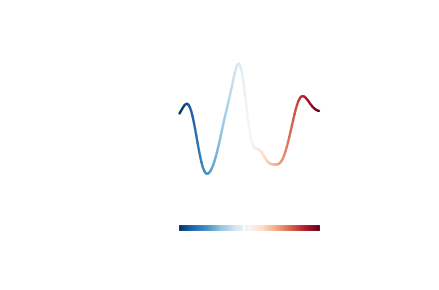

In [19]:
with plt.rc_context(
    {'axes.edgecolor':'w', 'axes.labelcolor':'w', 
     'xtick.color':'w', 'ytick.color':'w', 
     'axes.facecolor':'none', 'figure.facecolor':'none', 
    }
    ):
    fig = plt.figure(figsize=(4.5,3.0))
    gs = fig.add_gridspec(
        nrows=1, ncols=1, #left=0.05, right=0.95, top=0.96, bottom=0.12
        )
    ax = fig.add_subplot(gs[0,0])
    
CC = utils.CrossCorrPlot(fig, ax, vsini=vsini_i, vtell=Res.vtell)
CC.plot(rv, CCF_SNR, CCF_SNR_old, lw=3, c='w', plot_colorbar=False)
#CC.plot(rv, CCF_SNR, None, lw=3, c='w', plot_colorbar=False)
#CC.plot(rv, CCF_SNR, None, lw=3, c=color_A, plot_colorbar=False, plot_multicolor=False)
CC.configure_ax(
    xlabel=r'$v\ \mathrm{(km\ s^{-1})}$', ylabel=r'Cross-correlation S/N', 
    ylim=(-11,13), xlim=(-70,70), plot_axvline=False, 
    )
CC.colorbar(h=0.03, lw=0.8, c='w', N=100)
CC.add_xtick_at_vtell(c='w')

#CC.ax.plot(rv, CCF_SNR_old, c=color_A, lw=1.5, alpha=1, zorder=-1)

# Add velocity resolution element
R = 60000; v_res = 3e5/R
ax.errorbar(
    -55, 0.08, xerr=v_res/2, transform=ax.get_xaxis_transform(), c='w', 
    clip_on=False, capsize=3., capthick=1.5, elinewidth=1.8
)
ax.annotate(
    r'$R_\mathrm{CRIRES^+}$', xy=(-55,0.11), 
    xycoords=ax.get_xaxis_transform(), annotation_clip=False, c='w', 
    ha='center', va='bottom', 
)
print(CCF_SNR.max())
plt.tight_layout()
#plt.savefig('./plots_Exo_5/no_band_ret_CCF.png', dpi=300)
#plt.savefig('./plots_Exo_5/eq_band_ret_CCF.png', dpi=300)
#plt.savefig('./plots_Exo_5/16A_CCF.png', dpi=300)
#plt.savefig('./plots_Exo_5/no_band_ret_CCF_new_molecfit.png', dpi=300)
#plt.savefig('./plots_Exo_5/eq_band_ret_CCF_new_molecfit.png', dpi=300)
plt.savefig('./plots_Exo_5/no_band_ret_CCF_old_molecfit.png', dpi=300)
plt.show()
plt.close()

# Chemical cross-correlation

100%|██████████| 1201/1201 [00:05<00:00, 234.09it/s]


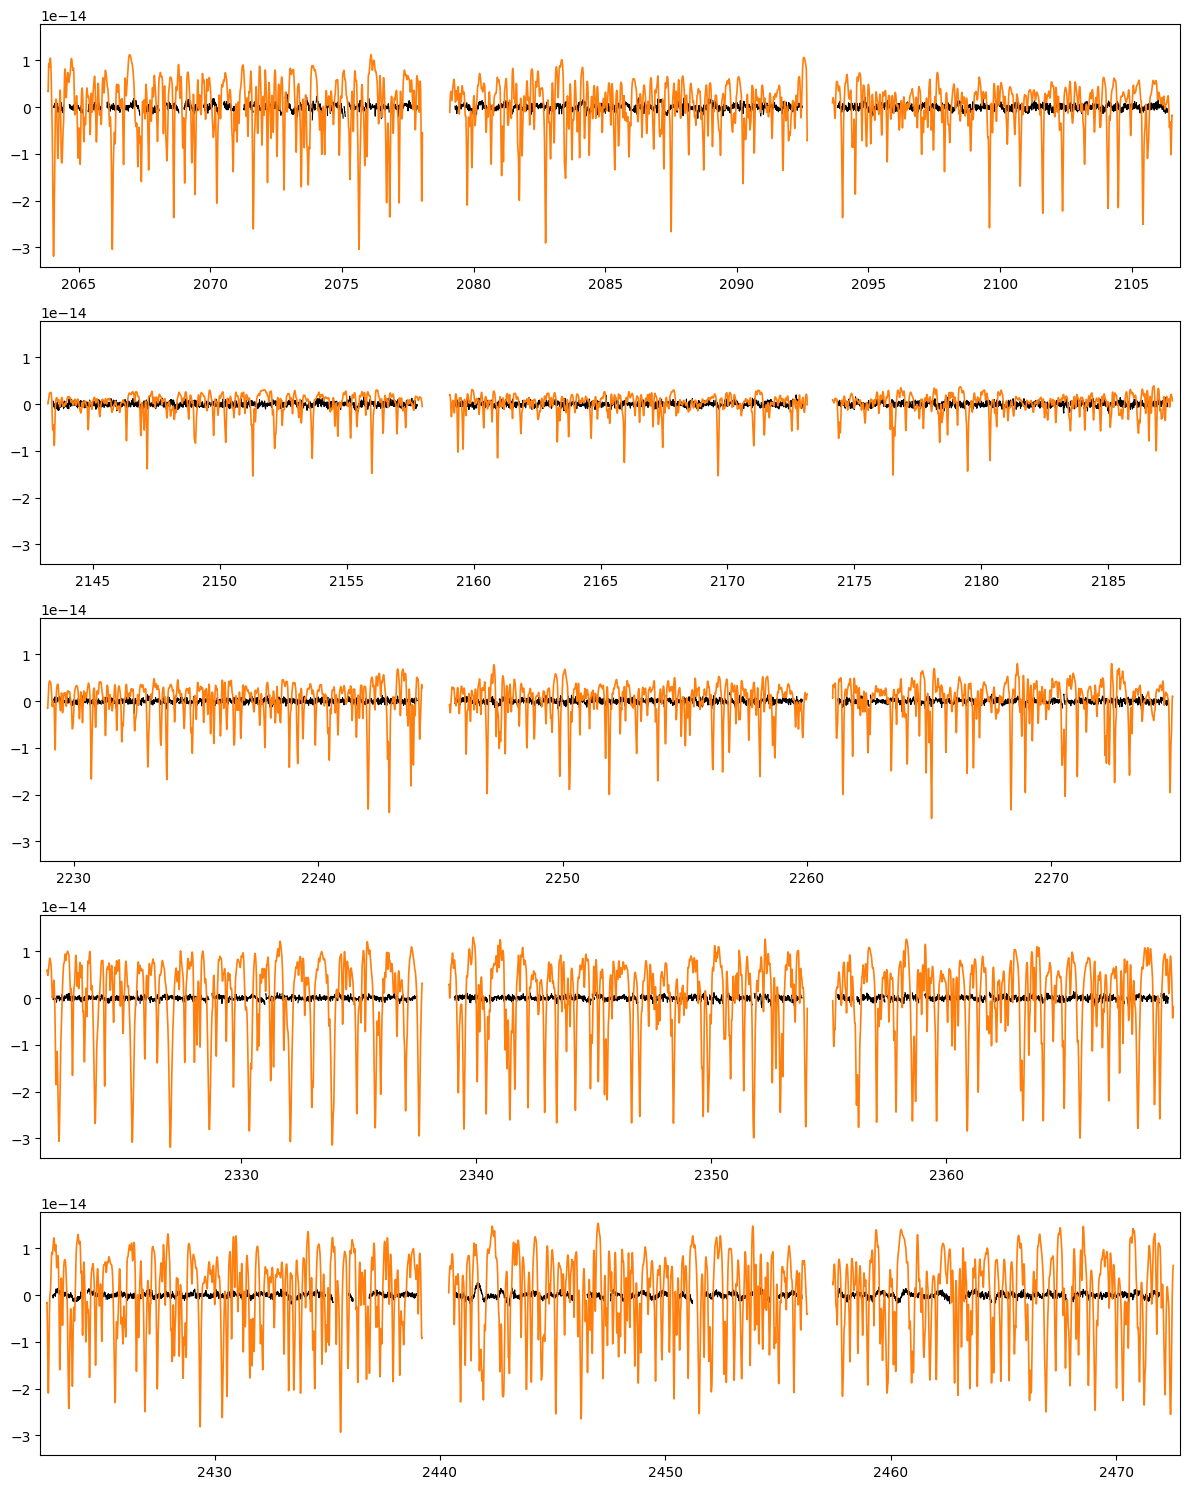

Generating a model with only H2O_pokazatel_main_iso


100%|██████████| 1201/1201 [00:05<00:00, 235.33it/s]


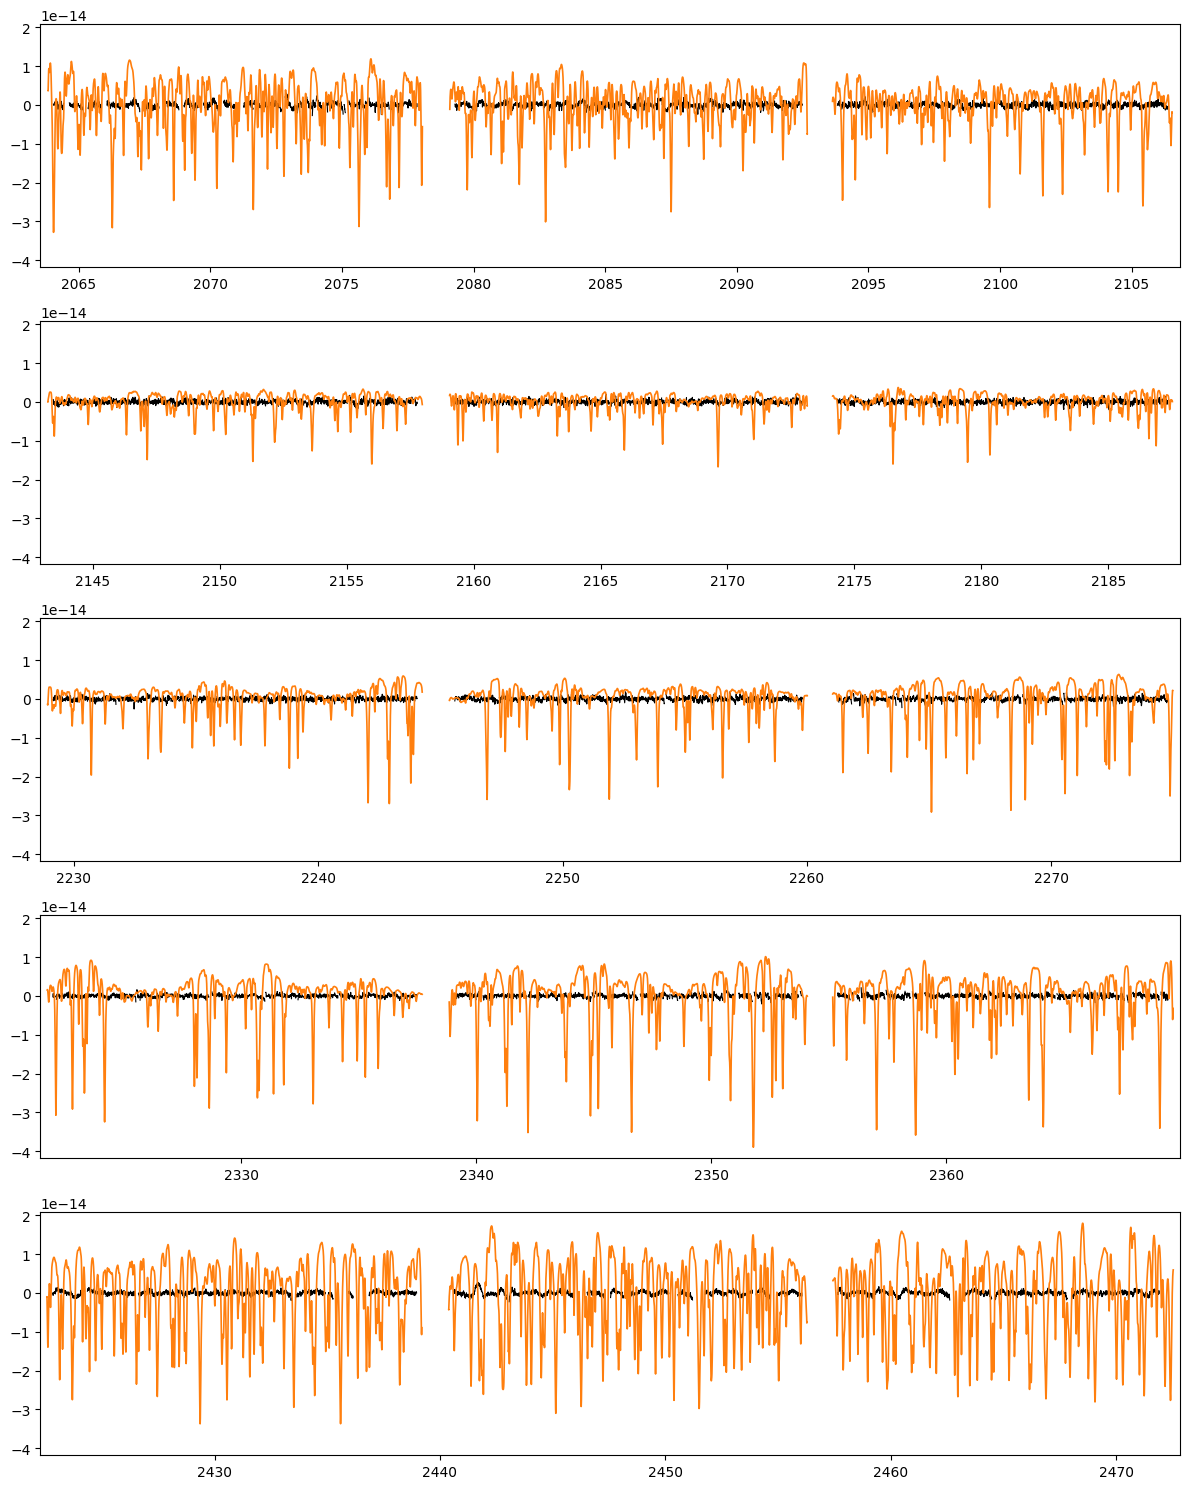

Generating a model with only CO_high_Sam


100%|██████████| 1201/1201 [00:05<00:00, 235.99it/s]


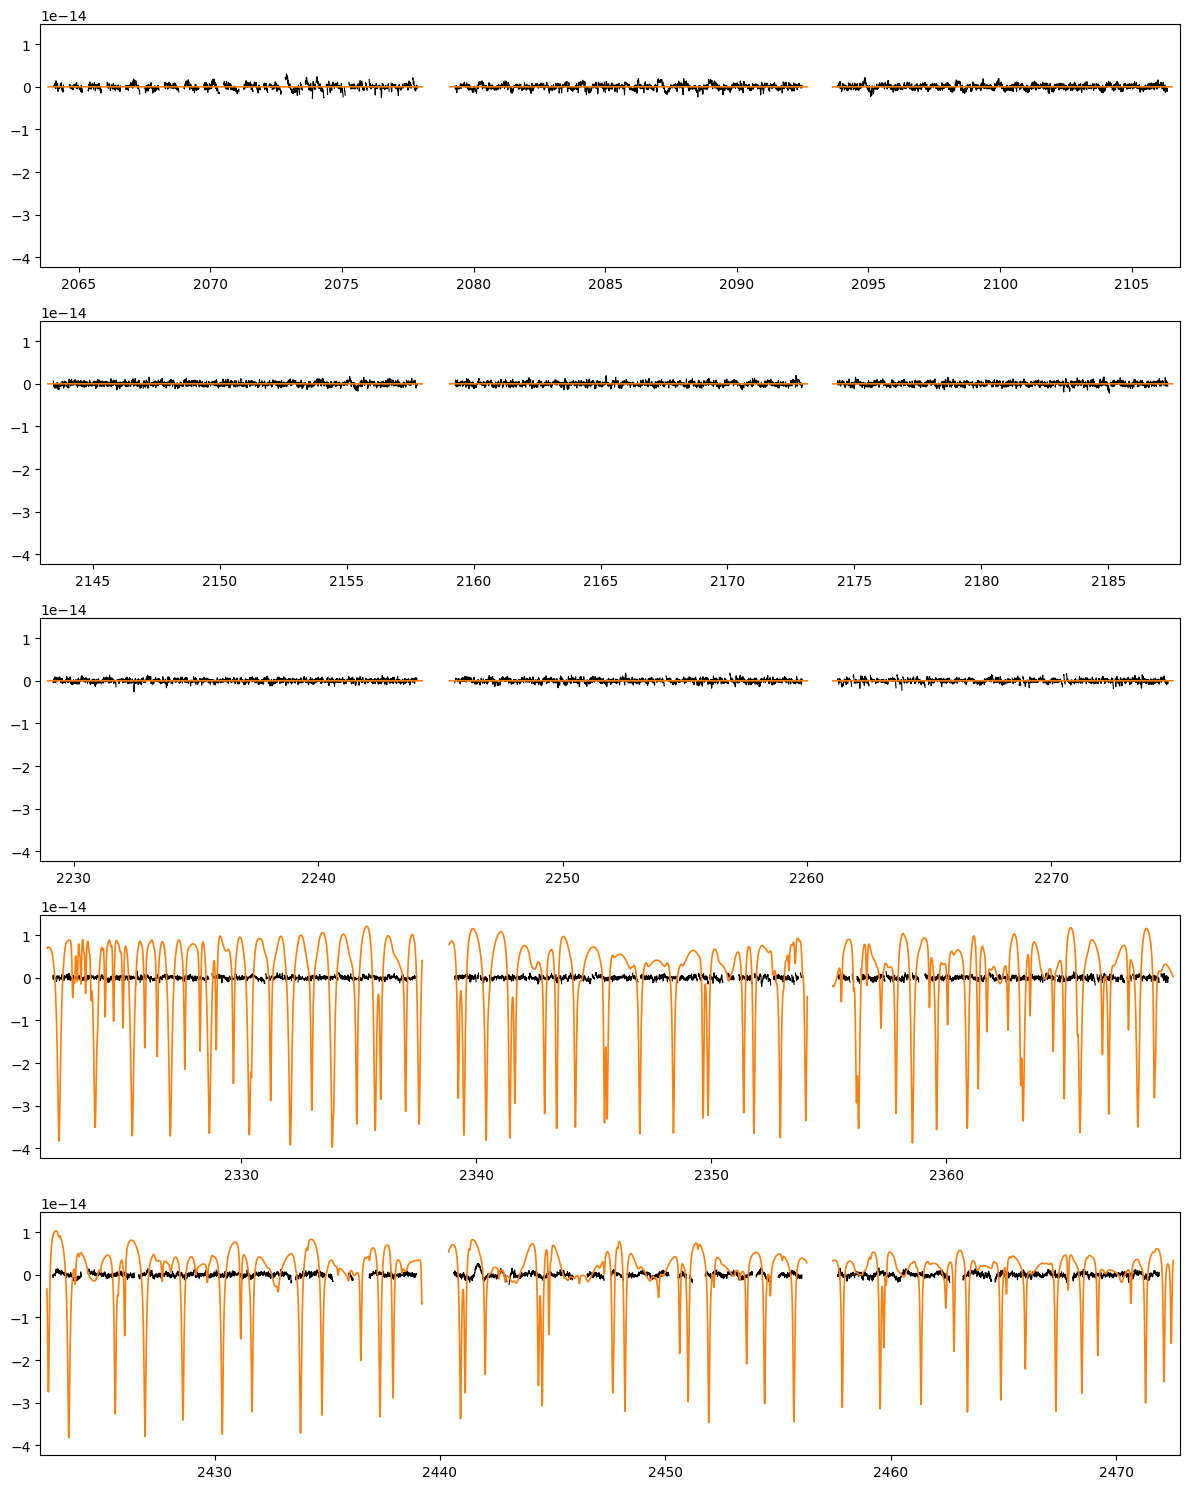

Generating a model with only CH4_hargreaves_main_iso


100%|██████████| 1201/1201 [00:05<00:00, 234.06it/s]


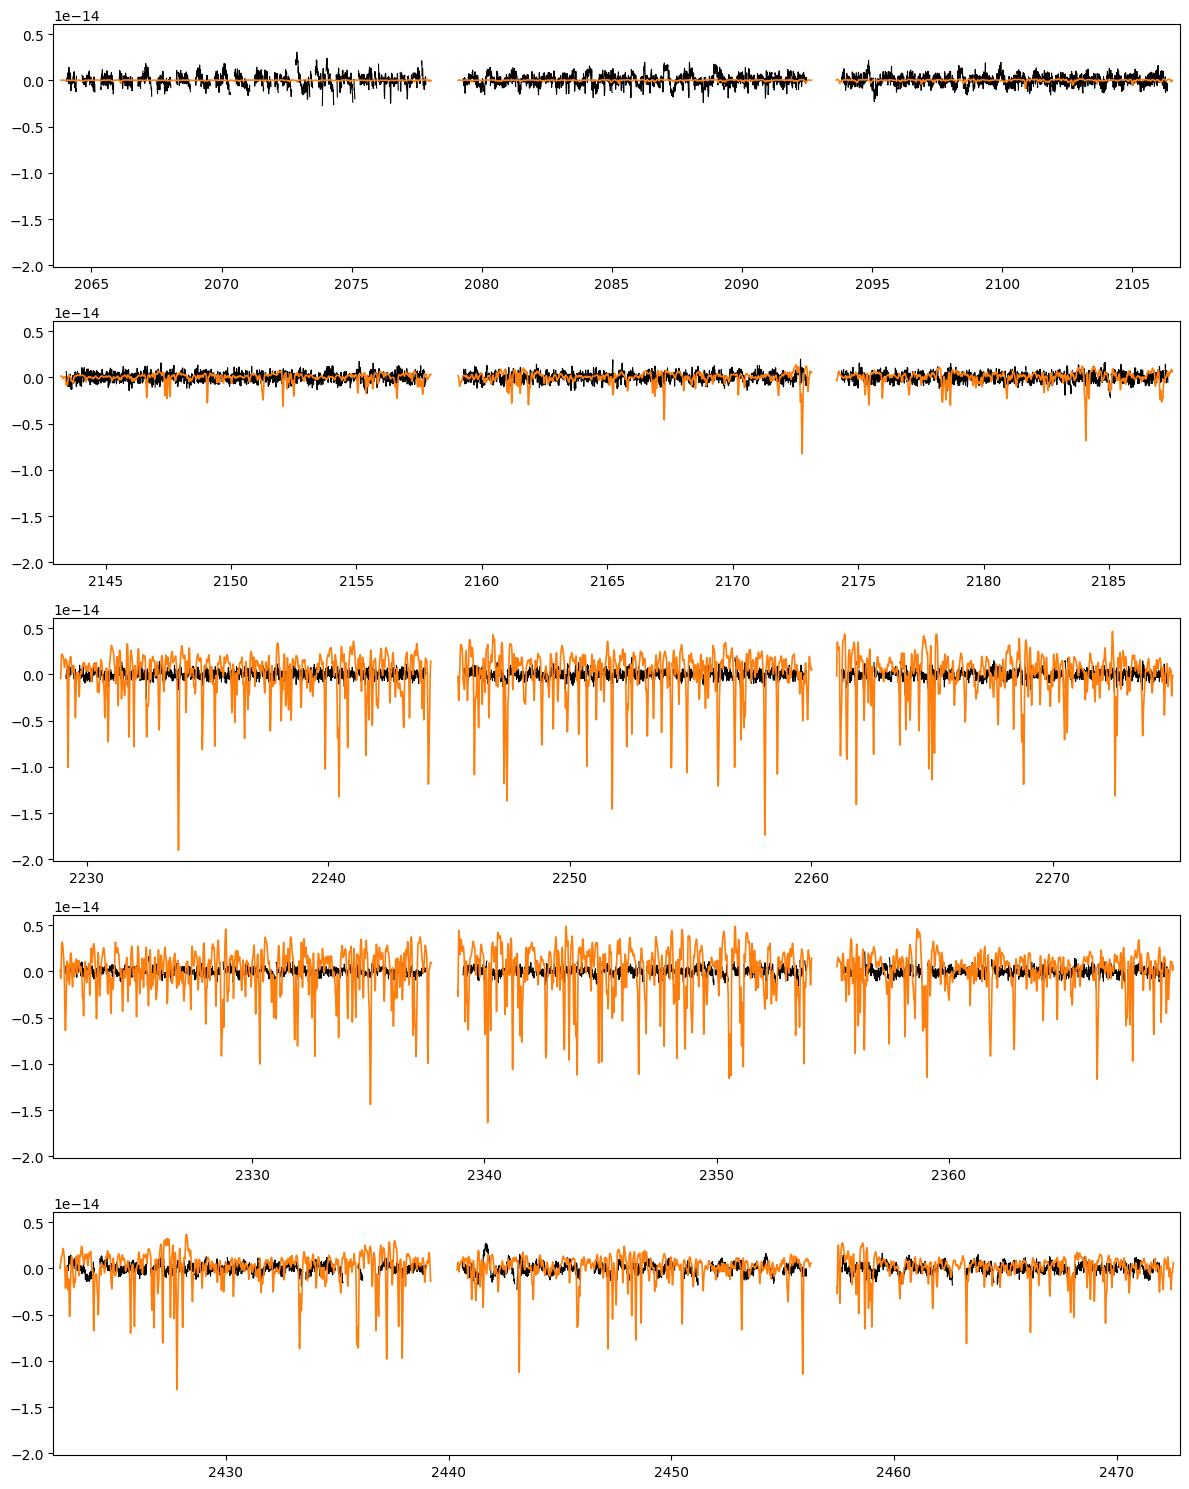

"\nCCF_tell = {\n    'complete': None, 'H2O': 'H2O_pokazatel_main_iso', 'CO': 'CO_main_iso', 'CH4': 'CH4_hargreaves_main_iso', \n    }\nfor key_j, line_species_j in CCF_species.items():\n\n    print(f'{key_j}')\n\n    # Template spectrum of one species\n    wave_local, flux_local, _ = Res.get_model_spec(\n        is_local=True, line_species_to_include=line_species_j\n        )\n    \n    # Perform the cross-correlation on the residual tellurics\n    rv, _, CCF_SNR, _, _ = Res.get_telluric_CCF(\n        wave_local, flux_local, tell_threshold=0.7, \n        high_pass={\n            'm_res': utils.high_pass_filter(window_length=301), \n            'tell_res': utils.high_pass_filter(window_length=301), \n            }, \n        )\n    CCF_tell[key_j] = CCF_SNR\n    #CCF_mf[key_j][i]   = CCF_mf_SNR\n\n    del wave_local, flux_local, flux_global\n"

In [7]:
CCF_species = {
    #'complete': None, 'H2O': 'H2O_pokazatel_main_iso', 'CO': 'CO_main_iso', 'CH4': 'CH4_hargreaves_main_iso', 
    'complete': None, 
    'H2O': 'H2O_pokazatel_main_iso', 
    'CO': 'CO_high_Sam', 
    'CH4': 'CH4_hargreaves_main_iso', 
    }

# Get the global model spectrum
_, flux_global, Rot = Res.get_model_spec(is_local=False)

for key_j, line_species_j in CCF_species.items():

    #print(f'{key_j}')
    # Template spectrum of one species
    wave_local, flux_local, _ = Res.get_model_spec(
        is_local=True, line_species_to_include=line_species_j
        )
    
    # Compute cross-correlation
    rv, _, CCF_SNR = Res.get_CCF(
        wave_local, flux_local, #rv=np.arange(-300,300+1e-6,1), 
        model_to_subtract_from_d_res='m_flux_phi', 
        plot=True, 
        )
    CCF_species[key_j] = CCF_SNR

    del wave_local, flux_local
del flux_global

'''
CCF_tell = {
    'complete': None, 'H2O': 'H2O_pokazatel_main_iso', 'CO': 'CO_main_iso', 'CH4': 'CH4_hargreaves_main_iso', 
    }
for key_j, line_species_j in CCF_species.items():

    print(f'{key_j}')

    # Template spectrum of one species
    wave_local, flux_local, _ = Res.get_model_spec(
        is_local=True, line_species_to_include=line_species_j
        )
    
    # Perform the cross-correlation on the residual tellurics
    rv, _, CCF_SNR, _, _ = Res.get_telluric_CCF(
        wave_local, flux_local, tell_threshold=0.7, 
        high_pass={
            'm_res': utils.high_pass_filter(window_length=301), 
            'tell_res': utils.high_pass_filter(window_length=301), 
            }, 
        )
    CCF_tell[key_j] = CCF_SNR
    #CCF_mf[key_j][i]   = CCF_mf_SNR

    del wave_local, flux_local, flux_global
'''

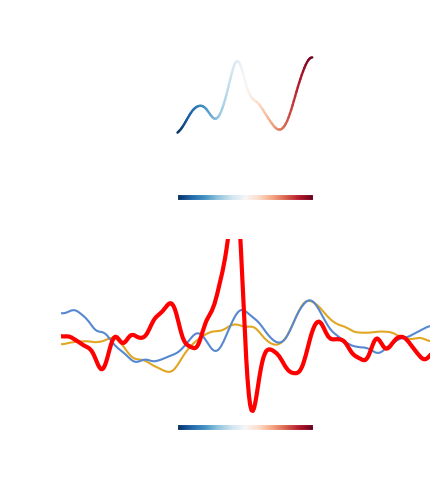

In [8]:
colors = {'H2O': utils.get_color(3), 'CO': utils.get_color(4), 'CH4': utils.get_color(2)}
#colors['CH4'] = 'C9'; colors['H2O'] = 'C3'
#colors['CH4'] = '#EC1F1F'
colors['CH4'] = 'red'

with plt.rc_context(
    {'axes.edgecolor':'w', 'axes.labelcolor':'w', 
     'xtick.color':'w', 'ytick.color':'w', 
     'axes.facecolor':'none', 'figure.facecolor':'none', 
    }
    ):
    fig = plt.figure(figsize=(4.5,5))
    gs = fig.add_gridspec(
        nrows=2, ncols=1, #left=0.05, right=0.95, top=0.96, bottom=0.12
        )
    ax = np.array([
        fig.add_subplot(gs[0,0], ), #sharex=gs[1,0], sharey=gs[1,0]), 
        fig.add_subplot(gs[1,0], ), #sharex=gs[1,0], sharey=gs[1,0]), 
        ])
    
CC = utils.CrossCorrPlot(fig, ax[0], vsini=Res.bestfit_params[Res.m_set]['vsini'], vtell=Res.vtell)
CC.plot(rv, CCF_species['complete'], None, lw=3, c='w', plot_colorbar=False)
#CC.plot(rv, CCF_species['CH4'], None, lw=3, c='C4', plot_colorbar=False, plot_multicolor=False)
#CC.plot(rv, CCF_species['H2O'], None, lw=3, c='C3', plot_colorbar=False, plot_multicolor=False)
#CC.plot(rv, CCF_species['CO'], None, lw=3, c='C1', plot_colorbar=False, plot_multicolor=False)
CC.configure_ax(
    #xlabel=r'$v\ \mathrm{(km\ s^{-1})}$', 
    #ylabel=r'Cross-correlation S/N', 
    xlabel=None, ylim=(-7,7), xlim=(-70,70), plot_axvline=False, 
    )
CC.colorbar(h=0.03, lw=0.8, c='w', N=100)
ax[0].set_yticks(np.arange(-6,8,2))

CC = utils.CrossCorrPlot(fig, ax[1], vsini=Res.bestfit_params[Res.m_set]['vsini'], vtell=Res.vtell)
CC.plot(rv, CCF_species['CO'], None, lw=1.5, c=colors['CO'], plot_colorbar=False, plot_multicolor=False)
CC.plot(rv, CCF_species['H2O'], None, lw=1.5, c=colors['H2O'], plot_colorbar=False, plot_multicolor=False)
CC.plot(rv, CCF_species['CH4'], None, lw=3, c=colors['CH4'], plot_colorbar=False, plot_multicolor=False)
CC.configure_ax(
    xlabel=r'$v\ \mathrm{(km\ s^{-1})}$', 
    ylabel=r'Cross-correlation S/N', 
    ylim=ax[0].get_ylim(), xlim=ax[0].get_xlim(), 
    plot_axvline=False, 
    )
CC.colorbar(h=0.03, lw=0.8, c='w', N=100)
ax[1].set_yticks(ax[0].get_yticks())

# Add velocity resolution element
R = 60000; v_res = 3e5/R
ax[0].errorbar(
    -55, 0.08, xerr=v_res/2, transform=ax[0].get_xaxis_transform(), c='w', 
    clip_on=False, capsize=3., capthick=1.5, elinewidth=1.8
)
ax[0].annotate(
    r'$R_\mathrm{CRIRES^+}$', xy=(-55,0.11), 
    xycoords=ax[0].get_xaxis_transform(), annotation_clip=False, c='w', 
    ha='center', va='bottom', 
)

ax[0].plot(
    [Res.vtell]*2, [0.06,0.14], transform=ax[0].get_xaxis_transform(), 
    c='w', clip_on=False, lw=1.8
)

plt.tight_layout()
#plt.savefig('./plots_Exo_5/eq_band_ret_chem_CCF.png', dpi=300)
#plt.savefig('./plots_Exo_5/eq_band_ret_chem_CCF_wo_CH4.png', dpi=300)
plt.show()
plt.close()

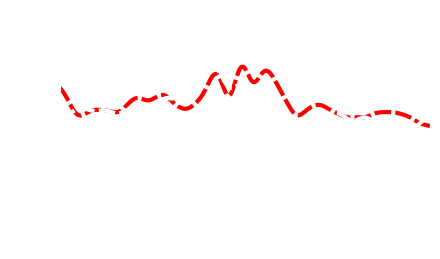

In [38]:
with plt.rc_context(
    {'axes.edgecolor':'w', 'axes.labelcolor':'w', 
     'xtick.color':'w', 'ytick.color':'w', 
     'axes.facecolor':'none', 'figure.facecolor':'none', 
    }
    ):
    fig = plt.figure(figsize=(4.5,2.7))
    gs = fig.add_gridspec(
        nrows=1, ncols=1, #left=0.05, right=0.95, top=0.96, bottom=0.12
        )
    ax = np.array([
        fig.add_subplot(gs[0,0]), 
        ])
    
CC = utils.CrossCorrPlot(fig, ax[0], vsini=Res.bestfit_params[Res.m_set]['vsini'], vtell=Res.vtell)
CC.plot(rv+Res.vtell, CCF_tell['CH4'], None, lw=3, c=colors['CH4'], ls=(0,(4,1)), plot_colorbar=False, plot_multicolor=False)
CC.plot(rv+Res.vtell, CCF_tell['complete'], None, lw=3, c='w', ls=(0,(4,1)), plot_colorbar=False, plot_multicolor=False)
CC.configure_ax(
    xlabel=r'$v\ \mathrm{(km\ s^{-1})}$', 
    ylabel=r'Cross-correlation S/N', 
    ylim=(-7,7), xlim=(-70,70), plot_axvline=False, 
    )
#CC.colorbar(h=0.03, lw=0.8, c='w', N=100)
ax[0].set_yticks(np.arange(-6,8,2))

# Add velocity resolution element
R = 60000; v_res = 3e5/R
ax[0].errorbar(
    -55, 0.08, xerr=v_res/2, transform=ax[0].get_xaxis_transform(), c='w', 
    clip_on=False, capsize=3., capthick=1.5, elinewidth=1.8
)
ax[0].annotate(
    r'$R_\mathrm{CRIRES^+}$', xy=(-55,0.11), 
    xycoords=ax[0].get_xaxis_transform(), annotation_clip=False, c='w', 
    ha='center', va='bottom', 
)

ax[0].plot(
    [Res.vtell]*2, [0.06,0.14], transform=ax[0].get_xaxis_transform(), 
    c='w', clip_on=False, lw=1.8
)

plt.tight_layout()
plt.savefig('./plots_Exo_5/molecfit_std_CCF.png', dpi=300)
plt.show()
plt.close()

# Posteriors

In [3]:
Res_A = utils.RetrievalResults(prefix='../retrieval_outputs/no_bands_K_A_ret_2/test_', load_posterior=True)
Res_B = utils.RetrievalResults(prefix='../retrieval_outputs/no_bands_K_B_ret_7/test_', load_posterior=True)

  analysing data from ../retrieval_outputs/no_bands_K_A_ret_2/test_.txt
  analysing data from ../retrieval_outputs/no_bands_K_B_ret_7/test_.txt


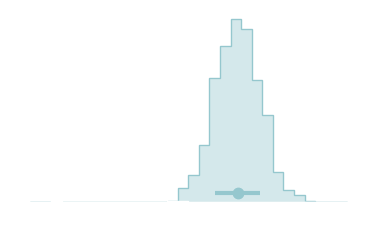

In [62]:
q = 1/2 + 1/2*np.array([-0.997,-0.95,-0.68,0,+0.68,+0.95,+0.997])

CO_A = 10**Res_A.posterior[:,12] / (10**Res_A.posterior[:,9]+10**Res_A.posterior[:,12])
CO_B = 10**Res_B.posterior[:,11] / (10**Res_B.posterior[:,9]+10**Res_B.posterior[:,11])
q_CO_A = np.nanquantile(CO_A, q=q)
q_CO_B = np.nanquantile(CO_B, q=q)

with plt.rc_context(
    {'axes.edgecolor':'w', 'axes.labelcolor':'w', 
     'xtick.color':'w', 'ytick.color':'w', 
     'axes.facecolor':'none', 'figure.facecolor':'none', 
    }
    ):
    fig, ax = plt.subplots(figsize=(4.5,2.5))
    ax.set(yticks=[])
    ax.spines[['right','top','left']].set_visible(False)

def get_fc(color, alpha=0.4):
    rgba = list(mpl.colors.to_rgba(color))
    rgba[-1] = alpha
    return tuple(rgba)

ax.hist(CO_A, fc=get_fc(color_A), ec=color_A, histtype='stepfilled', bins=30, range=(0.68,0.71))
ax.hist(CO_B, fc=get_fc(color_B), ec=color_B, histtype='stepfilled', bins=30, range=(0.68,0.71))
kwargs = dict(
    fmt='.', transform=ax.get_xaxis_transform(), elinewidth=3, markersize=15, zorder=10
)
ax.errorbar(
    q_CO_A[3], 0.05, xerr=np.abs(np.array([q_CO_A[2],q_CO_A[4]])[:,None]-q_CO_A[3]), color=color_A, **kwargs
    )
ax.errorbar(
    q_CO_B[3], 0.05, xerr=np.abs(np.array([q_CO_B[2],q_CO_B[4]])[:,None]-q_CO_B[3]), color=color_B, **kwargs
    )
plt.show()

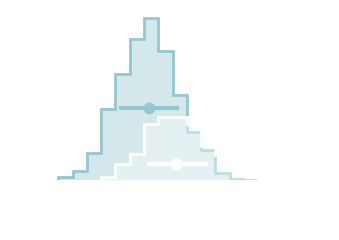

In [106]:
q = 1/2 + 1/2*np.array([-0.997,-0.95,-0.68,0,+0.68,+0.95,+0.997])

C12_C13_A = 10**Res_A.posterior[:,12] / 10**Res_A.posterior[:,13]
q_C12_C13_A = np.nanquantile(C12_C13_A, q=q)
C12_C13_B = 10**Res_B.posterior[:,11] / 10**Res_B.posterior[:,13]
q_C12_C13_B = np.nanquantile(C12_C13_B, q=q)

with plt.rc_context(
    {'axes.edgecolor':'w', 'axes.labelcolor':'w', 
     'xtick.color':'w', 'ytick.color':'w', 
     'axes.facecolor':'none', 'figure.facecolor':'none', 
    }
    ):
    fig, ax = plt.subplots(figsize=(3.5,2.5))
    ax.set(yticks=[])
    ax.spines[['right','top','left']].set_visible(False)

ax.hist(C12_C13_A, fc=get_fc(color_A, alpha=0.4), ec=color_A, histtype='stepfilled', bins=20, range=(76,102), lw=2)
ax.hist(C12_C13_B, fc=get_fc(color_B, alpha=0.4), ec=color_B, histtype='stepfilled', bins=20, range=(76,102), lw=2)

kwargs = dict(
    fmt='.', transform=ax.get_xaxis_transform(), elinewidth=3, markersize=15, zorder=10
)
xerr = np.abs(np.array([q_C12_C13_A[2],q_C12_C13_A[4]])[:,None]-q_C12_C13_A[3])
ax.errorbar(
    q_C12_C13_A[3], 0.43, xerr=xerr, color=color_A, **kwargs
    )
xerr = np.abs(np.array([q_C12_C13_B[2],q_C12_C13_B[4]])[:,None]-q_C12_C13_B[3])
ax.errorbar(
    q_C12_C13_B[3], 0.1, xerr=xerr, color=color_B, **kwargs
    )
ax.set(xlabel=r'$\mathrm{^{12}CO/^{13}CO}$')
#ax.axvline(89, c='C0')
plt.tight_layout()
plt.savefig('./plots_Exo_5/C12_C13_posterior.png', dpi=300)
plt.show()